#**ARIMA Model**
## **Autoregressive Integrated Moving Average**
The general process of arima model is the following:


*   Visualize the time series
*   Check if the time series data is stationary
*   Plot a Correlation and Autocorrelation plot, to get the lag value
*   Construct ARIMA Model or Sarima model based on data

An Arima Model is classified by 3 values:

*  **p**:- It is the order of AR term
*  **d**:- It is the number of differencing required to make the series staionary
*   **q**:-It is the order MA term














##**What is Stationarity?**
A stationary time series is one whose properties do not depend on the time at which the series is observed.14 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

##**How to make a series Stationary?**
The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.


In [ ]:
### Keras and Tenserflow >2.0

In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 30.2MB/s 
     |████████████████████████████████| 9.5MB 27.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas_datareader.data as pdr
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pdr.get_data_alphavantage(symbols='MSFT', api_key='3c54c7a6a6mshd224c2f0f886f15p1ff024jsnb152669e5e20');

In [ ]:
df.shape

(5028, 5)

##Lets visualize per day stock closing price of Apple

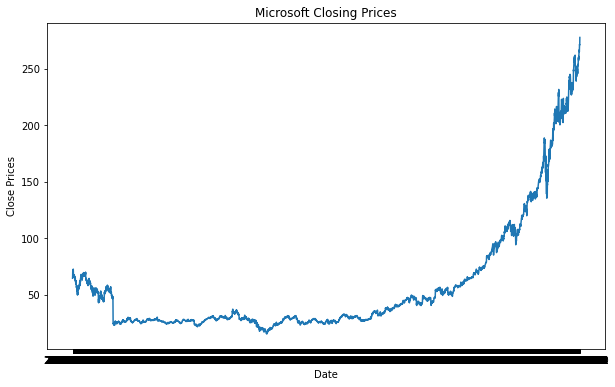

In [ ]:
plt.figure(figsize=(10,6))
plt.ylabel("Close Prices")
plt.title("Microsoft Closing Prices")
plt.xlabel("Date")
plt.plot(df["close"])
plt.show()

##**Augmented Dickey Fuller Test**
The **Dickey-Fuller test** is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

**Null Hypothesis**: The series has a unit root (value of a =1)

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.



In [ ]:
from statsmodels.tsa.stattools import adfuller

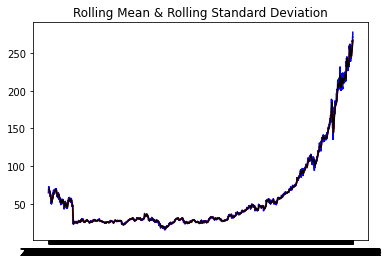

<Figure size 24000x1200 with 0 Axes>

Result for ADF Test
Test Statistic                    6.342850
p-value                           1.000000
#Lags Used                       26.000000
Number of Observations Used    5001.000000
Critical Value (1%)              -3.431658
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


In [ ]:
def testStationarity(ts):
  rollMean = ts.rolling(12).mean()
  rollStd = ts.rolling(12).mean()

  #Plot for roling statistics
  org = plt.plot(ts, color= 'blue', label='Original Data')
  mean = plt.plot(rollMean, color = 'red', label='Rolling Mean')
  std = plt.plot(rollStd, color='black', label='Standard Deviation')
  plt.title('Rolling Mean & Rolling Standard Deviation')
  plt.show(block='false')

  #Augmented Dickey Fuller Test
  print("Result for ADF Test")
  dftest = adfuller(ts, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)

testStationarity(df.close)

As we can see from the above plot that  our mean, standard deviation are not stationary and our p-value > 0.05 so we cannot reject our null hypothesis. Therefore we can conclude that our dataset is **Non-Stationary**. So we have to make the data stationary first to train our Arima Model.

To make the series stationary we need to find 'd'.

**d**=In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. 'd' refers to the number of differencing transformations required by the time series to get stationary.

##**Auto Correlation Funtion Plot**:
Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

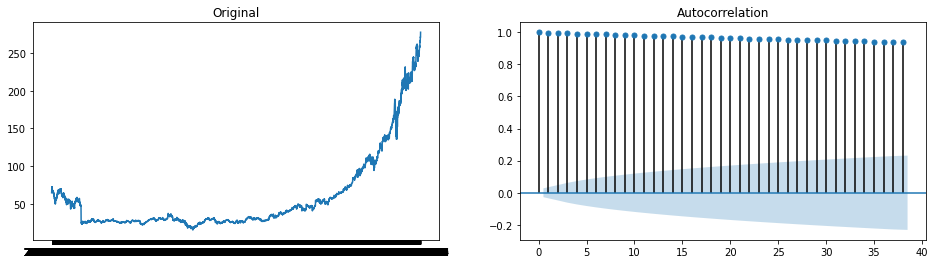

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.close)
ax1.set_title("Original")
plot_acf(df.close, ax=ax2);

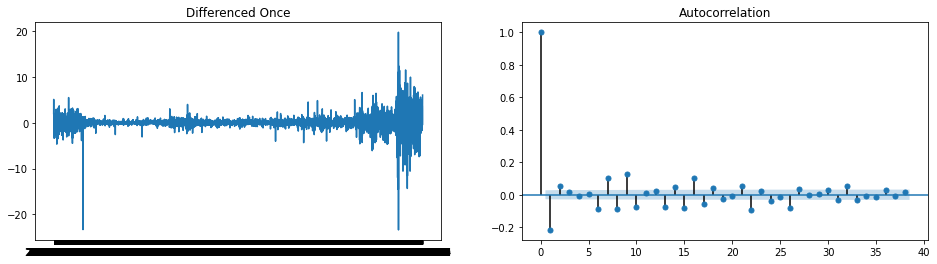

In [ ]:
diff = df.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff.close)
ax1.set_title("Differenced Once")
plot_acf(diff.close, ax=ax2);

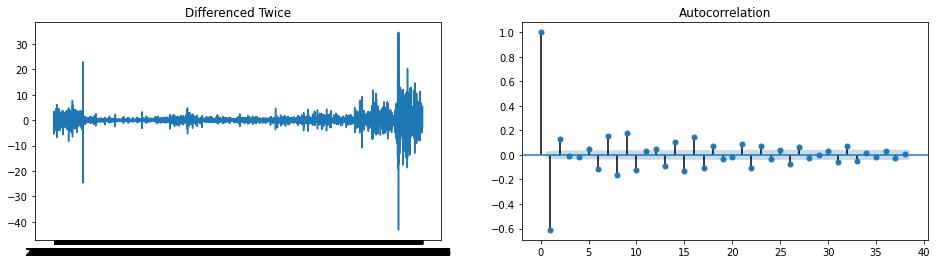

In [ ]:
diff = df.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff.close)
ax1.set_title("Differenced Twice")
plot_acf(diff.close, ax=ax2);

As we can see in the 2nd differencing the lag goes to far negative as compared to differencing once. Which indicates the that the series might have been over differenced. So our 'd' will be equal to 1.

We can also use **pmdarima** library to decide the **'d'** value for our Arima Model

In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df.close, test='adf')

1

##**What is p in ARIMA Model?**
p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors.

We can find out the required number of AR terms by inspecting the **Partial Autocorrelation(PACF) Plot**.

The PACF represent the correlation between the series and the its lag

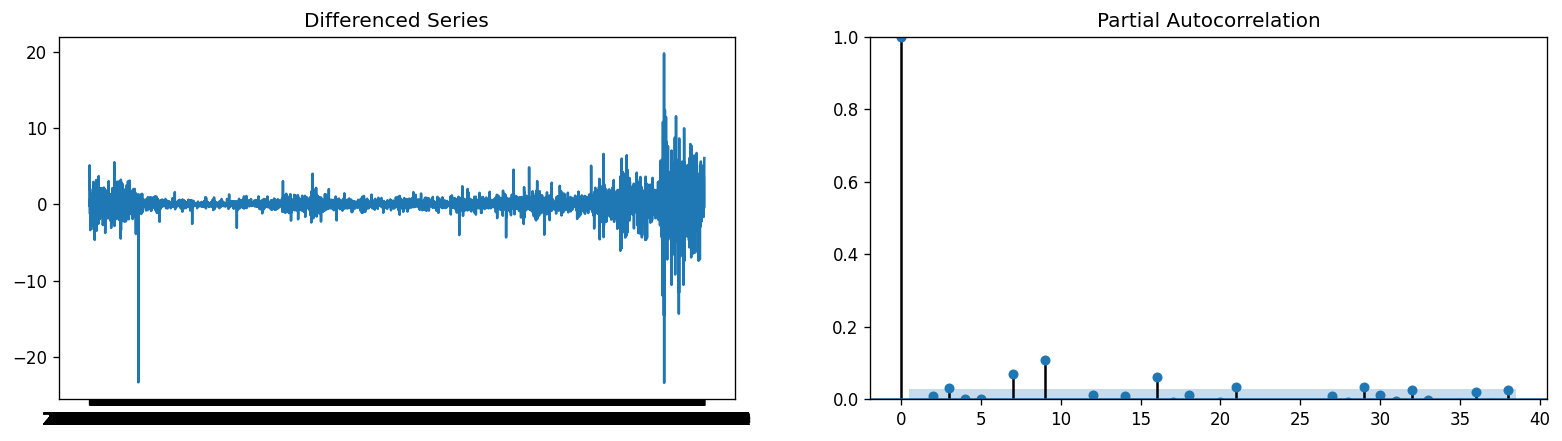

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4), dpi=120)

ax1.plot(diff.close)
ax1.set_title("Differenced Series")
ax2.set_ylim(0,1)
plot_pacf(diff.close, ax=ax2);

Here we can see the PACF 3 lag is significant and its above the significance line. So our 'p' will be 1


##**What is q in ARIMA?**
q is the order of the **Moving Average(MA)** term. It refers to the number of lagged forcast errors that should go into the ARIMA Model

We can look at the ACF to find the number of MA terms.


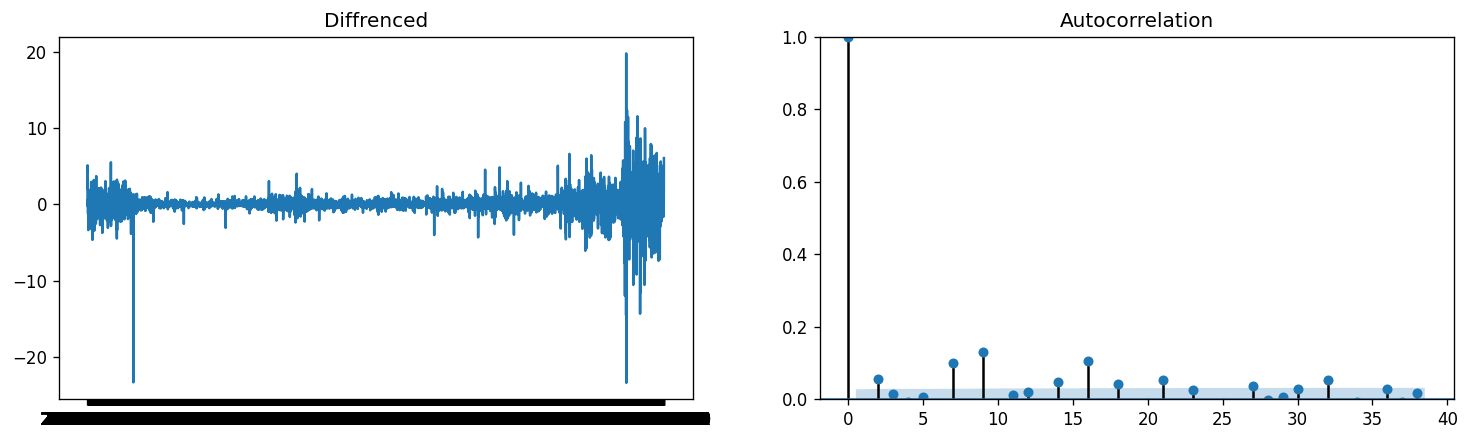

In [ ]:
diff = df.close.diff().dropna();

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4), dpi=(120))

ax1.plot(diff)
ax1.set_title("Diffrenced")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

By observing the ACF plot we can choose our q. Here out q will be 0


##**Fit ARIMA Model**

Train on the Train dataset and test on Test dataset


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[df.len():]
print(train.shape, test.shape)

(5028, 5)
(4998, 5) (30, 5)


**Prediction using auto_arima**

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.84 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=22678.595, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=20323.188, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=19482.240, Time=0.31 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=19129.622, Time=0.39 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=18909.410, Time=0.53 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=18864.193, Time=0.67 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.87 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.37 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=18866.193, Time=1.76 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 12.825 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5028
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -9426.096
Date:                Mon, 05 Jul 2021   AIC                          18864.193
Time:                        09:19:55   BIC                          18903.327
Sample:                             0   HQIC                         18877.905
                               - 5028                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0303      0.004   -237.670      0.000      -1.039      -1.022
ar.L2         -0.7894      0.007   -110.785      0.000      -0.803      -0.775
ar.L3         -0.5327      0.008    -66.113      0.000      -0.549      -0.517
ar.L4         -0.3063      0.008    -40.386      0.000      -0.321      -0.291
ar.L5         -0.0969      0.005    -19.675      0.000      -0.107      -0.087
sigma2         2.4913      0.012    201.662      0.000       2.467       2.516
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):            287781.55
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               5.54   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Predicition with the best fit model**

In [ ]:
#order(p,d,q)
model = ARIMA(train['close'], order=(5,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                 4996
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -9342.510
Method:                       css-mle   S.D. of innovations              1.570
Date:                Mon, 05 Jul 2021   AIC                          18699.021
Time:                        09:51:28   BIC                          18744.635
Sample:                             2   HQIC                         18715.009
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0003      0.006     -0.045      0.964      -0.012       0.011
ar.L1.D2.close    -1.0317      0.014    -73.224      0.000      -1.059      -1.004
ar.L2.D2.close    -0.7908      0.020

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels')
pred.index = df.index[start:end+1]
print(pred)

2021-05-21    246.641101
2021-05-24    246.834879
2021-05-25    247.006478
2021-05-26    247.659810
2021-05-27    248.482962
2021-05-28    249.055619
2021-06-01    249.497479
2021-06-02    250.034452
2021-06-03    250.611564
2021-06-04    251.201901
2021-06-07    251.759096
2021-06-08    252.300767
2021-06-09    252.855183
2021-06-10    253.417566
2021-06-11    253.977897
2021-06-14    254.534170
2021-06-15    255.088556
2021-06-16    255.644537
2021-06-17    256.201415
2021-06-18    256.757566
2021-06-21    257.312879
2021-06-22    257.867848
2021-06-23    258.422803
2021-06-24    258.977638
2021-06-25    259.532126
2021-06-28    260.086267
2021-06-29    260.640149
2021-06-30    261.193803
2021-07-01    261.747208
2021-07-02    262.300336
dtype: float64


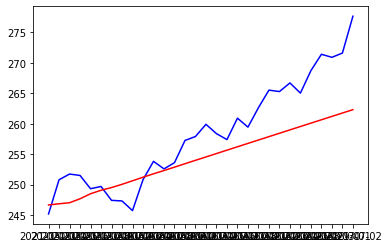

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.plot(test['close'], color='blue', label ='Original Data')
plt.plot(pred, color='red', label='Predicted Data')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
test['close'].mean()

258.1935

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['close'])) ;
print(rmse)

5.8837430870725695


**Prediction for future dates**

In [ ]:
#order(p,d,q)
model = ARIMA(df['close'], order=(5,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                 5026
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -9426.096
Method:                       css-mle   S.D. of innovations              1.578
Date:                Mon, 05 Jul 2021   AIC                          18866.193
Time:                        10:04:19   BIC                          18911.849
Sample:                             2   HQIC                         18882.190
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.102e-05      0.006      0.015      0.988      -0.012       0.012
ar.L1.D2.close    -1.0303      0.014    -73.304      0.000      -1.058      -1.003
ar.L2.D2.close    -0.7894      0.020

In [ ]:
test.tail()

,open,high,low,close,volume
2021-06-28,266.185,268.9000,265.9100,268.72,19590024
2021-06-29,268.865,271.6500,267.9800,271.40,19937811
2021-06-30,270.690,271.3598,269.6043,270.90,21656457
2021-07-01,269.610,271.8400,269.6000,271.60,16725323
2021-07-02,272.820,278.0000,272.5000,277.65,26474408


In [ ]:
index_future_dates = pd.date_range(start='2021-07-03', end='2021-08-02')
pred = model_fit.predict(start=len(df), end=len(df)+30, typ='levels')
pred.index = index_future_dates
print(pred)

2021-07-03    278.727173
2021-07-04    281.138309
2021-07-05    283.191477
2021-07-06    285.455055
2021-07-07    288.078555
2021-07-08    290.429742
2021-07-09    292.645918
2021-07-10    294.995000
2021-07-11    297.328508
2021-07-12    299.693929
2021-07-13    302.036055
2021-07-14    304.358009
2021-07-15    306.694359
2021-07-16    309.036289
2021-07-17    311.376236
2021-07-18    313.714930
2021-07-19    316.051396
2021-07-20    318.389440
2021-07-21    320.728693
2021-07-22    323.067559
2021-07-23    325.406174
2021-07-24    327.744784
2021-07-25    330.083622
2021-07-26    332.422706
2021-07-27    334.761816
2021-07-28    337.100951
2021-07-29    339.440181
2021-07-30    341.779524
2021-07-31    344.118972
2021-08-01    346.458503
2021-08-02    348.798116
Freq: D, dtype: float64


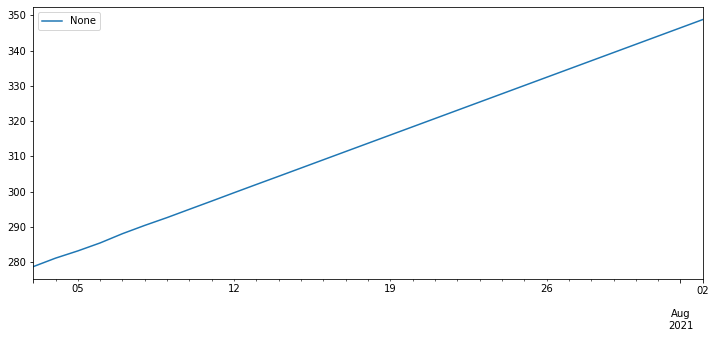

In [ ]:
pred.plot(figsize=(12, 5), legend=True)
